In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [10]:
!pip3 install joblib

In [19]:
data = pd.read_csv('train.csv')
for column in data.columns: 
    unique_elements = data[column].unique() 
    print(f"Column: {column}, Unique Elements: {unique_elements}")

Column: Unnamed: 0, Unique Elements: [     0      1      2 ... 103901 103902 103903]
Column: id, Unique Elements: [ 70172   5047 110028 ...  68825  54173  62567]
Column: Gender, Unique Elements: ['Male' 'Female']
Column: Customer Type, Unique Elements: ['Loyal Customer' 'disloyal Customer']
Column: Age, Unique Elements: [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
Column: Type of Travel, Unique Elements: ['Personal Travel' 'Business travel']
Column: Class, Unique Elements: ['Eco Plus' 'Business' 'Eco']
Column: Flight Distance, Unique Elements: [ 460  235 1142 ...  974 1479  400]
Column: Inflight wifi service, Unique Elements: [3 2 4 1 5 0]
Column: Departure/Arrival time convenient, Unique Elements: [4 2 5 3 1 0]
Column: Ease of Online booking, Unique Elements: [3 2 5 4 1 0]
Column: Gate location, Unique 

In [14]:
print(data.shape)
missing_values = data.isnull().sum()
missing_values


(103904, 25)


Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [20]:
#data = data.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Customer Type'] = label_encoder.fit_transform(data['Customer Type'])
data['Type of Travel'] = label_encoder.fit_transform(data['Type of Travel'])
le_Class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
   
data['Class'] = label_encoder.fit_transform(data['Class'])

data['satisfaction'] = label_encoder.fit_transform(data['satisfaction'])

#Felesleges oszlopok:
data = data.drop('id', axis=1)
data = data.drop('Unnamed: 0', axis=1)
print(le_Class_mapping)

{'Business travel': 0, 'Personal Travel': 1}


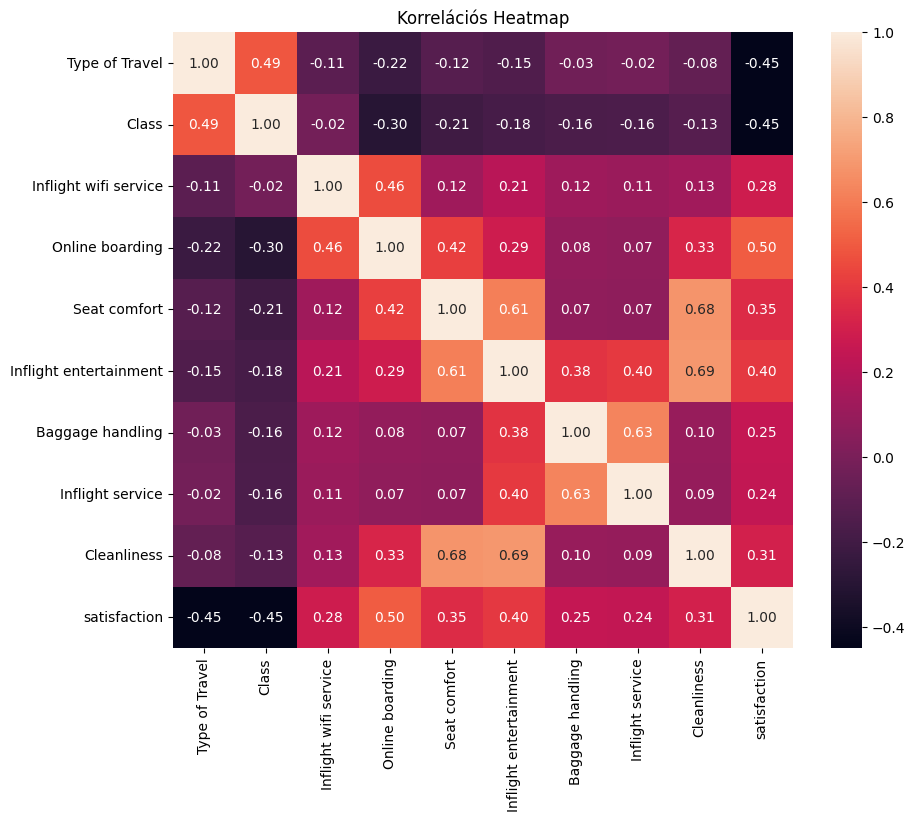

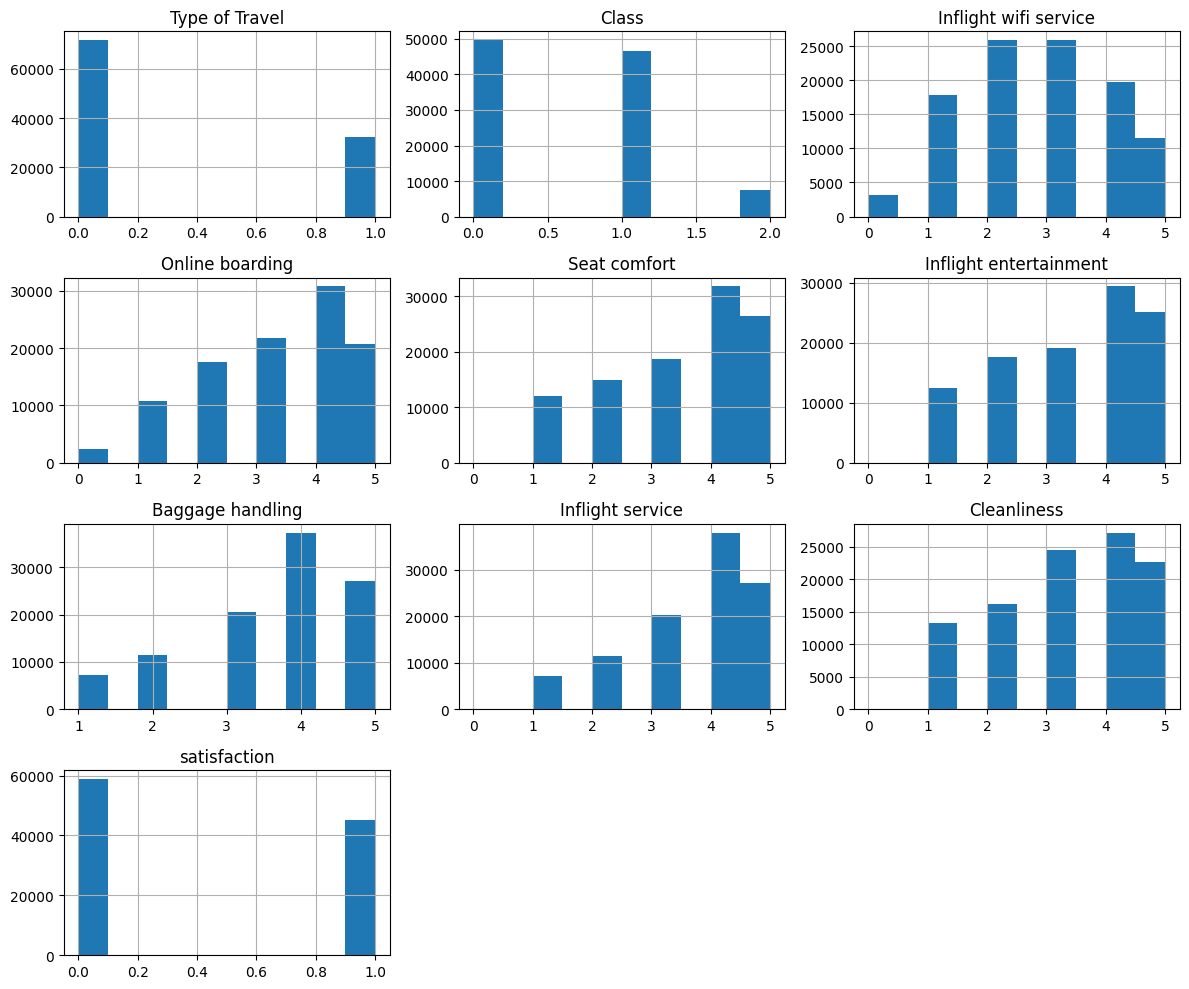

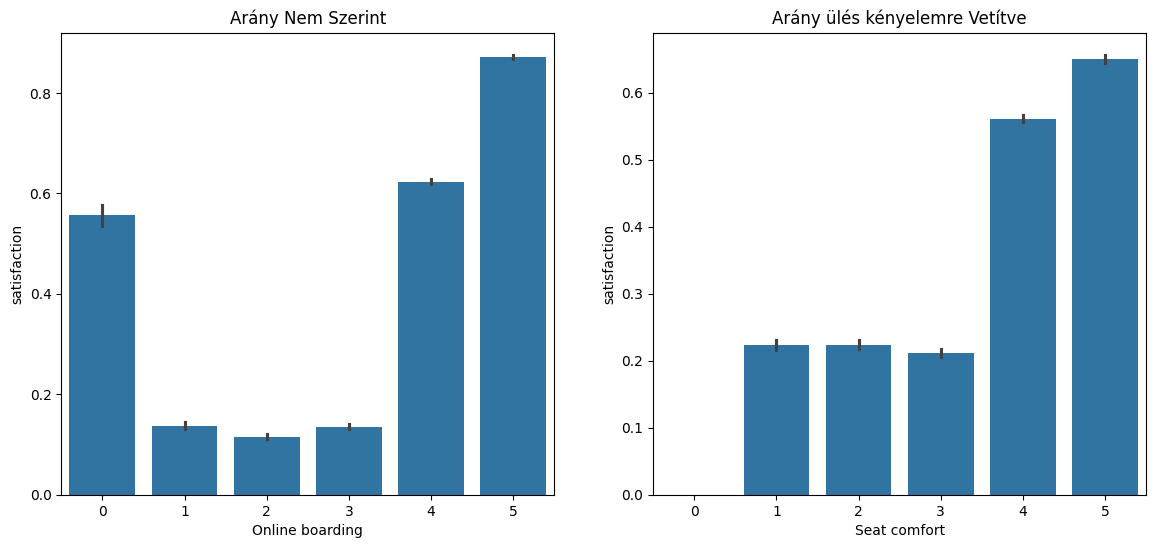

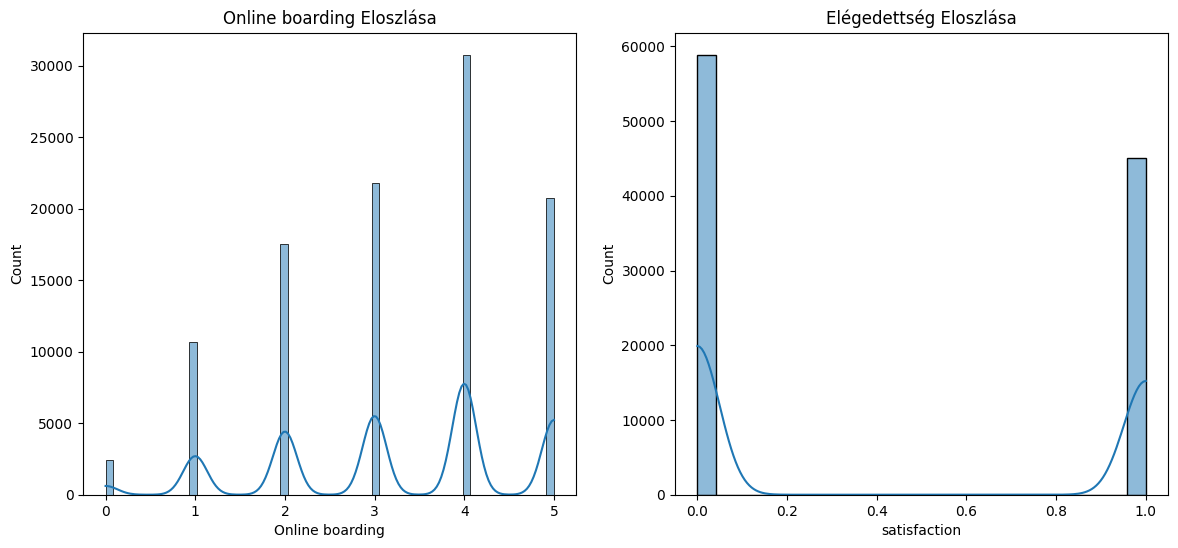

In [4]:
data = pd.read_csv('train.csv')

#'Online boarding', 'Class', 'Type of Travel', 'Inflight entertainment', 'Seat comfort', 'Cleanliness', 'Inflight wifi service', 'Baggage handling', 'Inflight service'
data = data.drop(['Unnamed: 0','id','Gender','Customer Type','Age','Flight Distance','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','On-board service','Leg room service','Checkin service','Departure Delay in Minutes','Arrival Delay in Minutes'], axis=1)

label_encoder = LabelEncoder()

data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])
le_Class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
data['Type of Travel'] = label_encoder.fit_transform(data['Type of Travel'])
le_TypeOfTravel_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

#data = data.drop(['Departure/Arrival time convenient','Age','Ease of Online booking','Gender','Customer Type','Departure Delay in Minutes', 'Gate location','Baggage handling','Checkin service','Inflight service','Type of Travel'], axis=1)

#data = data.drop(['Departure/Arrival time convenient','Age','Ease of Online booking','Gender','Customer Type','Departure Delay in Minutes', 'Gate location','Inflight service'], axis=1)
#data = data.drop('Arrival Delay in Minutes', axis=1)


missing_values = data.isnull().sum()
missing_values

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Korrelációs Heatmap')
plt.show()

data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='Online boarding', y='satisfaction', data=data, ax=ax[0])
ax[0].set_title('Arány Nem Szerint')
sns.barplot(x='Seat comfort', y='satisfaction', data=data, ax=ax[1])
ax[1].set_title('Arány ülés kényelemre Vetítve')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(data['Online boarding'], kde=True, ax=ax[0])
ax[0].set_title('Online boarding Eloszlása')
sns.histplot(data['satisfaction'], kde=True, ax=ax[1])
ax[1].set_title('Elégedettség Eloszlása')
plt.show()


In [11]:
features = data.drop('satisfaction', axis=1)
target = data['satisfaction']

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2)

print(f'Train features méret: {X_train.shape}')
print(f'Test features méret: {X_test.shape}')
print(f'Train target méret: {Y_train.shape}')
print(f'Test target méret: {Y_test.shape}')

Train features méret: (83123, 9)
Test features méret: (20781, 9)
Train target méret: (83123,)
Test target méret: (20781,)


In [12]:
log_reg = LogisticRegression()

linear_reg = log_reg.fit(X_train,Y_train)

Y_test_pred = log_reg.predict(X_test)
print(classification_report(Y_test, Y_test_pred))
print(confusion_matrix(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87     11793
           1       0.83      0.81      0.82      8988

    accuracy                           0.85     20781
   macro avg       0.84      0.84      0.84     20781
weighted avg       0.85      0.85      0.85     20781

[[10306  1487]
 [ 1709  7279]]


In [13]:
linear_reg = LinearRegression()

# fit
linear_reg = linear_reg.fit(X_train,Y_train)
# pred on train
Y_train_pred = linear_reg.predict(X_train)
# pred on test
Y_test_pred = linear_reg.predict(X_test)
# metrics
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

(train_mse, train_r2, test_mse, test_r2)


(0.12981026792532088,
 0.4714196231543909,
 0.12964927809032953,
 0.47177904591683384)

Accuracy: 0.9426399114575814


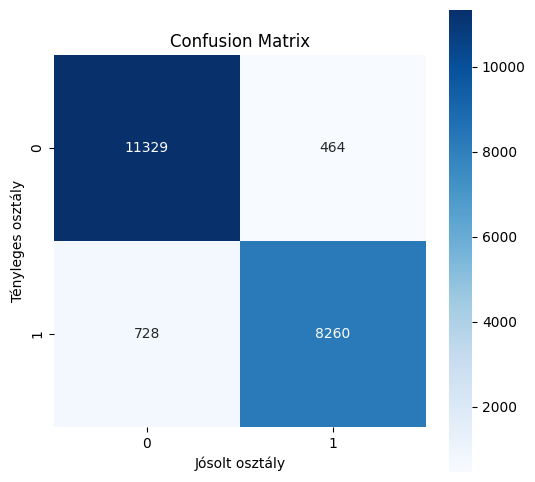

In [14]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(Y_test, y_pred))


conf_matrix = confusion_matrix(Y_test, y_pred)

# Confusion matrix megjelenítése heatmap segítségével
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True)
plt.title('Confusion Matrix')
plt.ylabel('Tényleges osztály')
plt.xlabel('Jósolt osztály')
plt.show()


In [15]:
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=200)
rf_model.fit(X_train, Y_train)
print("Random Forest ", accuracy_score(Y_test, rf_model.predict(X_test)))
y_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(Y_test, y_pred)
print(conf_matrix)


Random Forest  0.9470189115057023
[[11374   419]
 [  682  8306]]


In [ ]:


rf_model = RandomForestClassifier()
#svm_model = SVC()


rf_params = {'n_estimators': [10, 50, 100, 1000], 'max_depth': [None, 10, 20, 100, 1000]}
#svm_params = {'C': [0.1,1], 'kernel': ['linear', 'rbf']}

rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, scoring='accuracy')
#svm_grid = GridSearchCV(estimator=svm_model, param_grid=svm_params, cv=5, scoring='accuracy')

rf_grid.fit(X_train, Y_train)
#svm_grid.fit(X_train, Y_train)

print("Random Forest legjobb paraméterek:", rf_grid.best_params_)
print("Random Forest teszt halmazon elért pontosság:", accuracy_score(Y_test, rf_grid.predict(X_test)))

#print("SVM legjobb paraméterek:", svm_grid.best_params_)
#print("SVM teszt halmazon elért pontosság:", accuracy_score(Y_test, svm_grid.predict(X_test)))
conf_matrix = confusion_matrix(Y_test, y_pred)


Random Forest legjobb paraméterek: {'max_depth': 20, 'n_estimators': 100}
Random Forest teszt halmazon elért pontosság: 0.9464895818295559


In [29]:
model = Sequential([
    # Dense 1
    Dense(64,activation='relu', input_shape=(13,) ),Dropout(0.2),
    # Dense 2
    Dense(64,activation='relu'),Dropout(0.2),
    Dense(64,activation='relu'),Dropout(0.2),

    Dense(32,activation='relu'),Dropout(0.2),

    Dense(1,activation='sigmoid')
])

# Modell összeállítása
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/Users/lszlpotyondi/miniconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,329 (44.25 KB)

 Trainable params: 11,329 (44.25 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=250, verbose=1)

Epoch 1/250
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.6163 - loss: 0.6720 - val_accuracy: 0.5809 - val_loss: 0.6631
Epoch 2/250
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.6304 - loss: 0.6568 - val_accuracy: 0.6576 - val_loss: 0.6382
Epoch 3/250
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.6408 - loss: 0.6474 - val_accuracy: 0.6490 - val_loss: 0.6006
Epoch 4/250
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.7226 - loss: 0.5661 - val_accuracy: 0.8295 - val_loss: 0.4247
Epoch 5/250
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.8023 - loss: 0.4506 - val_accuracy: 0.8384 - val_loss: 0.4241
Epoch 6/250
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.8180 - loss: 0.4227 - val_accuracy: 0.8151 - val_loss: 0.4406
Epoch 7/250
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.8287 - loss: 0.4005 - val_accuracy: 0.8099 - val_loss: 0.4438
Epoch 8/250
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 

In [23]:
print(history.history)

Y_pred= model.predict(X_test)
Y_pred = np.round


conf_matrix = confusion_matrix(Y_test,Y_pred)

{'accuracy': [0.5794167518615723, 0.6220204830169678, 0.6331365704536438, 0.6371467113494873, 0.7388598322868347, 0.8182926177978516, 0.8312854766845703, 0.8396907448768616, 0.8433640003204346, 0.8471656441688538, 0.8502614498138428, 0.8559879660606384, 0.8570947647094727, 0.8590356707572937, 0.8659651875495911, 0.8654518723487854, 0.8726540803909302, 0.8723493218421936, 0.8672323822975159, 0.8712906241416931, 0.8642007112503052, 0.8679702281951904, 0.8763113021850586, 0.876728355884552, 0.8770331144332886, 0.8814924359321594, 0.8737448453903198, 0.8780757784843445, 0.8828879594802856, 0.8821982145309448, 0.8830323219299316, 0.8843796849250793, 0.8777389526367188, 0.8681466579437256, 0.8885663151741028, 0.886047899723053, 0.879711925983429, 0.873343825340271, 0.8732956647872925, 0.8790542483329773, 0.8825992345809937, 0.8897051811218262, 0.889817476272583, 0.8890154361724854, 0.8778351545333862, 0.8860800266265869, 0.8795996308326721, 0.8879086375236511, 0.8899778723716736, 0.885165691

InvalidParameterError: The 'y_pred' parameter of confusion_matrix must be an array-like. Got <function round at 0x118242af0> instead.

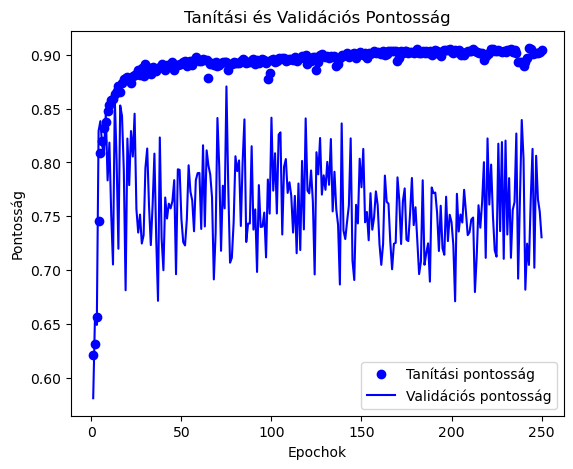

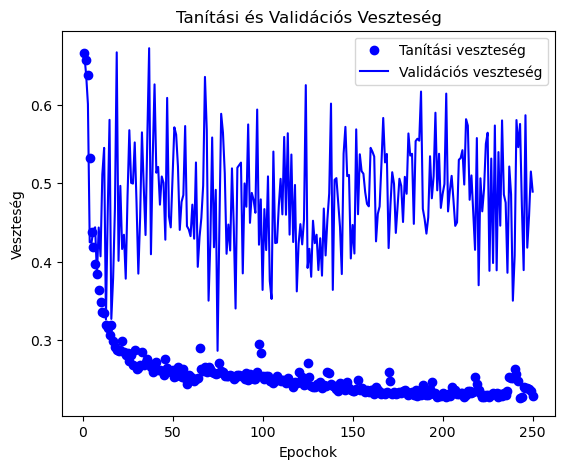

In [32]:





acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Veszteség grafikon
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Tanítási pontosság')
plt.plot(epochs, val_acc, 'b', label='Validációs pontosság')
plt.title('Tanítási és Validációs Pontosság')
plt.xlabel('Epochok')
plt.ylabel('Pontosság')
plt.legend()

plt.show()





loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Veszteség grafikon
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Tanítási veszteség')
plt.plot(epochs, val_loss, 'b', label='Validációs veszteség')
plt.title('Tanítási és Validációs Veszteség')
plt.xlabel('Epochok')
plt.ylabel('Veszteség')
plt.legend()

plt.show()

In [2]:
from itertools import combinations
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from concurrent.futures import ThreadPoolExecutor


data = pd.read_csv('train.csv')




#data = data.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Customer Type'] = label_encoder.fit_transform(data['Customer Type'])
data['Type of Travel'] = label_encoder.fit_transform(data['Type of Travel'])
data['Class'] = label_encoder.fit_transform(data['Class'])
data['satisfaction'] = label_encoder.fit_transform(data['satisfaction'])

#Felesleges oszlopok:
data = data.drop('id', axis=1)
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('Arrival Delay in Minutes', axis=1)

#data = data.drop(['Departure/Arrival time convenient','Age','Ease of Online booking','Gender','Customer Type','Departure Delay in Minutes', 'Gate location','Inflight service'], axis=1)


# Calculate the correlation of each feature with the label
correlations = data.corr()['satisfaction'].abs().sort_values(ascending=False)
top_features = correlations.index[1:15]  # Get the top 14 features (excluding the label)

# Split data into features and labels
X = data[top_features]
y = data['satisfaction']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to evaluate subsets of features
def evaluate_subset(features_subset):
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train[features_subset], y_train)
    y_pred = clf.predict(X_test[features_subset])
    return (features_subset, accuracy_score(y_test, y_pred))

# Generate and evaluate different subsets using parallel processing
def parallel_evaluation():
    results = {}
    columns = X.columns
    with ThreadPoolExecutor() as executor:
        futures = []
        for size in range(7, len(columns) + 1):
            for subset in combinations(columns, size):
                futures.append(executor.submit(evaluate_subset, list(subset)))
        for future in futures:
            subset, accuracy = future.result()
            print(f"Features: {subset}, Accuracy: {accuracy:.4f}")
            results[tuple(subset)] = accuracy
    return results

results = parallel_evaluation()

# Top 5 results
sorted_results = sorted(results.items(), key=lambda item: item[1], reverse=True)[:5]

for subset, accuracy in sorted_results:
    print(f"TOP 5 Featues: {subset}, Accuracy: {accuracy:.4f}")

Features: ['Online boarding', 'Class', 'Type of Travel', 'Inflight entertainment', 'Seat comfort', 'On-board service', 'Leg room service'], Accuracy: 0.8980
Features: ['Online boarding', 'Class', 'Type of Travel', 'Inflight entertainment', 'Seat comfort', 'On-board service', 'Cleanliness'], Accuracy: 0.9024
Features: ['Online boarding', 'Class', 'Type of Travel', 'Inflight entertainment', 'Seat comfort', 'On-board service', 'Flight Distance'], Accuracy: 0.8696
Features: ['Online boarding', 'Class', 'Type of Travel', 'Inflight entertainment', 'Seat comfort', 'On-board service', 'Inflight wifi service'], Accuracy: 0.9364
Features: ['Online boarding', 'Class', 'Type of Travel', 'Inflight entertainment', 'Seat comfort', 'On-board service', 'Baggage handling'], Accuracy: 0.8997
Features: ['Online boarding', 'Class', 'Type of Travel', 'Inflight entertainment', 'Seat comfort', 'On-board service', 'Inflight service'], Accuracy: 0.8998
Features: ['Online boarding', 'Class', 'Type of Travel', 'I

In [9]:
print(len(results))

# Top 5 results
sorted_results = sorted(results.items(), key=lambda item: item[1], reverse=True)[:100]
i=0
for subset, accuracy in sorted_results:
    print(f"{i}. {accuracy:.4f}, {len(subset)}, {subset}")
    i+=1

9908
0. 0.9519, 13, ('Online boarding', 'Class', 'Type of Travel', 'Inflight entertainment', 'Seat comfort', 'On-board service', 'Leg room service', 'Cleanliness', 'Flight Distance', 'Inflight wifi service', 'Baggage handling', 'Inflight service', 'Checkin service')
1. 0.9517, 14, ('Online boarding', 'Class', 'Type of Travel', 'Inflight entertainment', 'Seat comfort', 'On-board service', 'Leg room service', 'Cleanliness', 'Flight Distance', 'Inflight wifi service', 'Baggage handling', 'Inflight service', 'Checkin service', 'Food and drink')
2. 0.9510, 13, ('Online boarding', 'Class', 'Type of Travel', 'Inflight entertainment', 'Seat comfort', 'On-board service', 'Leg room service', 'Flight Distance', 'Inflight wifi service', 'Baggage handling', 'Inflight service', 'Checkin service', 'Food and drink')
3. 0.9509, 13, ('Online boarding', 'Class', 'Type of Travel', 'Seat comfort', 'On-board service', 'Leg room service', 'Cleanliness', 'Flight Distance', 'Inflight wifi service', 'Baggage ha